In [65]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [66]:



class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [67]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

#### I am going to use the iris dataset

URL: iris.data


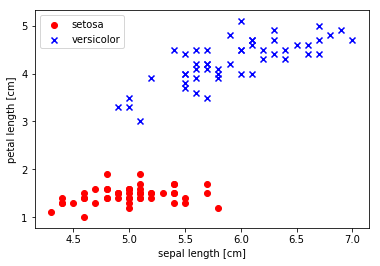

In [86]:
import os
import pandas as pd
s = 'iris.data'
print('URL:', s)

df = pd.read_csv(s,header=None,encoding='utf-8')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

## Training the perceptron model

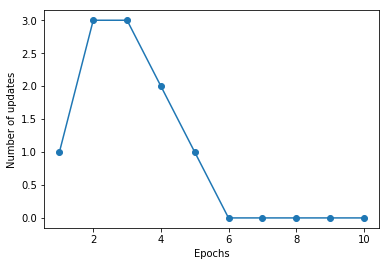

In [95]:
clfP = Perceptron(eta=0.1, n_iter=10)

clfP.fit(X, y)

plt.plot(range(1, len(clfP.errors_) + 1), clfP.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

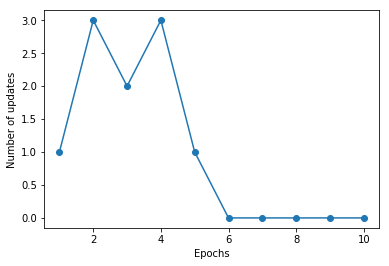

In [107]:
clfP = Perceptron(eta=0.001, n_iter=10)

clfP.fit(X, y)

plt.plot(range(1, len(clfP.errors_) + 1), clfP.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

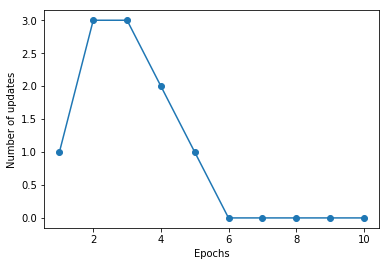

In [109]:
clfP = Perceptron(eta=0.05, n_iter=10)

clfP.fit(X, y)

plt.plot(range(1, len(clfP.errors_) + 1), clfP.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

### Evaluation

In [40]:
model = DSELinearClassifier(lr=0.1, num_iter=300000)

In [23]:
%time model.fit(X, y)

CPU times: user 10.2 s, sys: 36.2 ms, total: 10.2 s
Wall time: 10.2 s


In [32]:
preds = model.predict(X)
# accuracy
(preds == y).mean()

1.0

In [ ]:
'''
Picking a learning rate = 0.1 and number of iterations = 300000 the 
algorithm classified all instances successfully. 13.8 seconds were needed. 
These are the resulting weights:
'''

In [25]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])

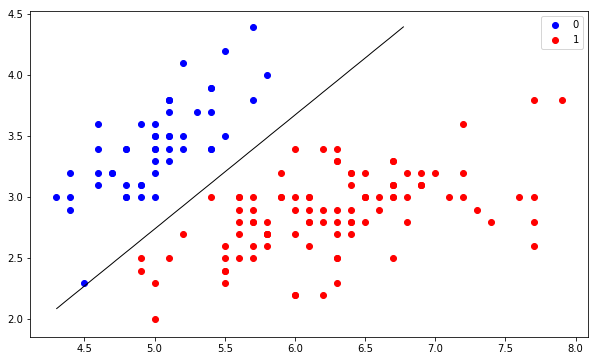

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

## Logistic Regression

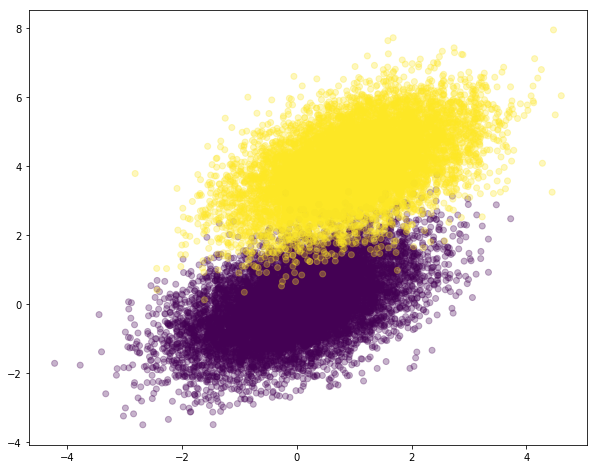

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum(target * scores - np.log(1 + np.exp(scores)))
    return ll

def logistic_regression(features, target, num_steps, learning_rate, add_intercept=False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))

    weights = np.zeros(features.shape[1])

    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))

    return weights

np.random.seed(10)
num_observations = 10000

x1 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, 0.5], [0.5, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations), np.ones(num_observations)))

plt.figure(figsize=(10, 8))
plt.scatter(
    simulated_separableish_features[:, 0],
    simulated_separableish_features[:, 1],
    c=simulated_labels,
    alpha=0.3,
)

plt.show()

### tanh or Hyperbolic:

#### The tanh function is just another possible functions that can be used as a nonlinear activation function between layers of a neural network. It actually shares a few things in common with the sigmoid activation function. They both look very similar. But while a sigmoid function will map input values to be between 0 and 1, Tanh will map values to be between -1 and 1.

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


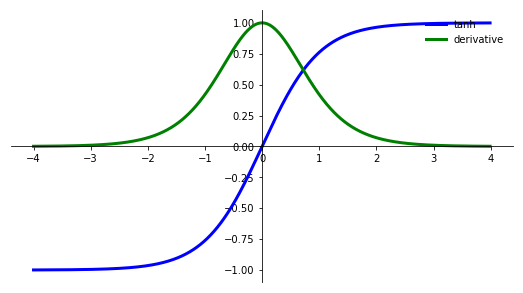

In [92]:
import matplotlib.pyplot as plt
import numpy as np

def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt
z=np.arange(-4,4,0.01)
tanh(z)[0].size,tanh(z)[1].size
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(z,tanh(z)[0], color="b", linewidth=3, label="tanh")
ax.plot(z,tanh(z)[1], color="g", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

### Observations:

1.it’s output is zero centered because its range in between -1 to 1 i.e -1 < output < 1 .

2.Hence optimization is easier in this method hence in practice it is always preferred over Sigmoid function .

### LogisticRegression from sklearn:

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression(C=1e20)

In [29]:
%time model.fit(X, y)

CPU times: user 3.34 ms, sys: 3.4 ms, total: 6.74 ms
Wall time: 9.25 ms


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
preds = model.predict(X)
# accuracy
(preds == y).mean()

1.0

In [31]:
model.intercept_, model.coef_

(array([-80.54201958]), array([[ 31.5951929 , -28.30153825]]))

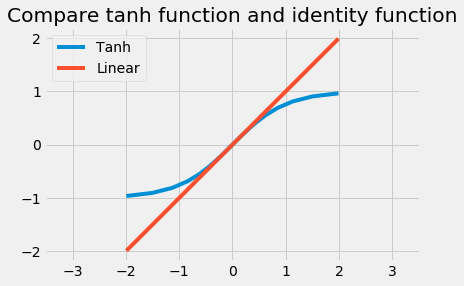

In [127]:
import matplotlib.style as style
style.use('fivethirtyeight')

# Prepare the data points
ymax = xmax = 2
x = np.logspace(-2, np.log10(xmax), num=20)
x = np.flip(-x, axis=0) + x
y_tanh = np.tanh(x)
y_lin = x  # Identity function y=f(x)=x

# Plot
plt.plot(x,y_tanh)
plt.plot(x,y_lin)

# Info for plot
plt.legend(['Tanh', 'Linear'])
plt.xlim([-xmax,xmax])
plt.ylim([-ymax,ymax])
plt.axis('equal')
plt.title('Compare tanh function and identity function')

plt.figsize = (12,8)
plt.text(x = -4, y = -3, s = "",
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
plt.show()